# Market segmentation

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
sns.set()

## Load the data

In [2]:
df = pd.read_csv ('Data/Example.csv')
df

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


## Plot the data

Create a preliminary plot to see if you can spot something

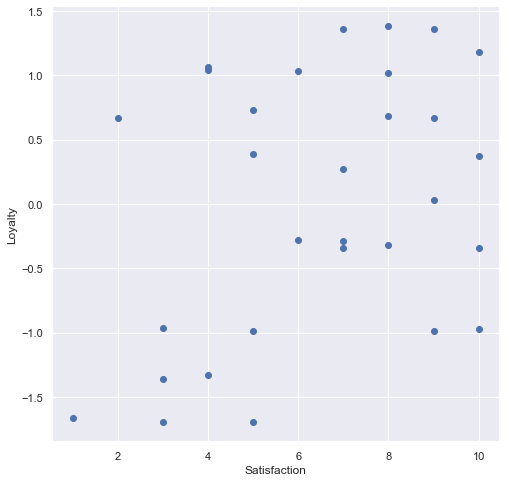

In [3]:
plt.figure(figsize=(8,8))
plt.scatter(df['Satisfaction'],df['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

## Clustering

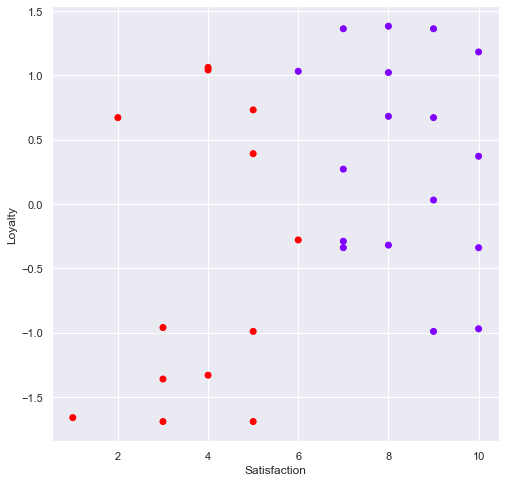

In [6]:
kmeans = KMeans(2)
kmeans.fit(df)
plt.figure(figsize=(8,8))
plt.scatter(df['Satisfaction'],df['Loyalty'],c=kmeans.labels_,cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

we can notic here that the cluster are non-sense due to the non-standarized variables

## Standardize the variables

Let's standardize and check the new result

In [21]:
df_scaled = pd.DataFrame(scale(df),columns=['Satisfaction','Loyalty'])
df_scaled

,Satisfaction,Loyalty
0,-0.931381,-1.331811
1,-0.155230,-0.281171
2,-0.543305,-0.991604
3,0.232845,-0.291177
4,-0.931381,1.059645
5,-2.095606,-1.662012
6,1.397071,-0.971592
7,0.620920,-0.321196
8,0.620920,1.019621
9,0.620920,0.679414


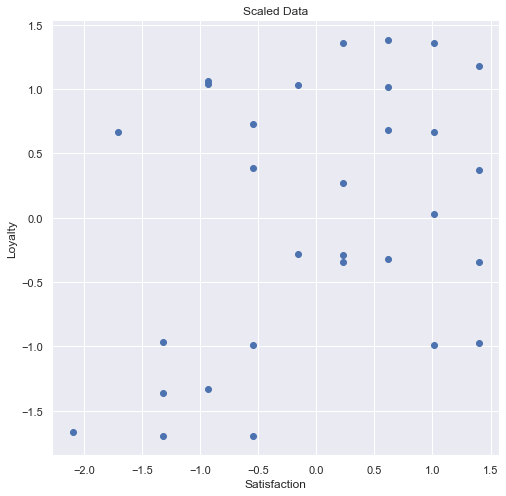

In [23]:
plt.figure(figsize=(8,8))
plt.scatter(df_scaled['Satisfaction'],df_scaled['Loyalty'])
plt.title('Scaled Data')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

## Elbow method

In [29]:
wcss =[]

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    
pd.DataFrame(wcss,columns=['WCSS'],index=range(1,10)).rename_axis(index='No. Clusters')

,WCSS
No. Clusters,
1,60.000000
2,29.818973
3,17.913350
4,10.247182
5,7.792695
6,6.571285
7,5.538868
8,4.412861
9,3.825482


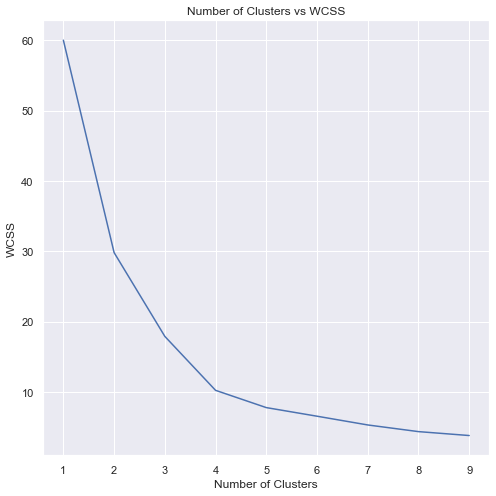

In [14]:
plt.figure(figsize=(8,8))
plt.plot(range(1,10),wcss)
plt.title('Number of Clusters vs WCSS')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

we should try the elbow values 2,3,4

## Explore clustering solutions and select the number of clusters

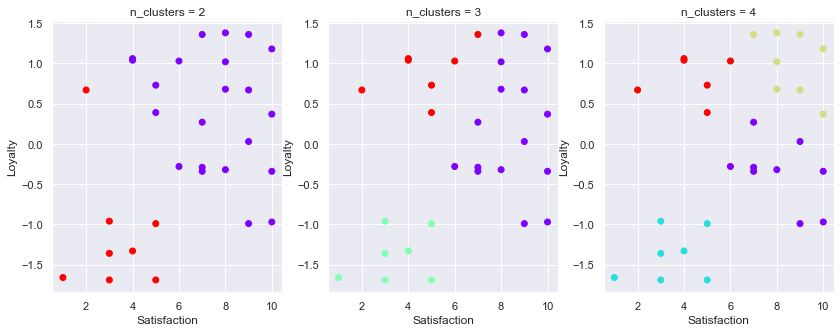

In [17]:
# Plot
fig,ax = plt.subplots(1,3,figsize=(14,5))
for i,n_clusters in enumerate([2,3,4]):
    KModel = KMeans(n_clusters)
    KModel.fit(df_scaled)
    ax[i].scatter(df['Satisfaction'],df['Loyalty'],c=KModel.labels_,cmap='rainbow')
    ax[i].set_xlabel('Satisfaction')
    ax[i].set_ylabel('Loyalty')
    ax[i].set_title(f"n_clusters = {n_clusters}")

the result for 4 clusters is the best we can name the clusters to 4 main clusters [Alienated, Roamers, Supporters, Fans]